In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append("../../")

In [4]:
from utils.transformer import  DataTransformer
from utils.dataset import Dataset
import metrics
from sklearn.metrics import accuracy_score

## Explore filtered columns

In [5]:
train_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="train",
    random_state=1000,
    return_filtered_cols=True
)

print(train_dset.data.shape)
train_dset.data.head()

(199523, 11)


,age,capital_gains,capital_losses,class_of_worker,education,marital_stat,major_occupation_code,sex,race,country_of_birth_self,income
0,73.0,0.0,0.0,Not in universe,High school graduate,Widowed,Not in universe,Female,White,United-States,<=50K
1,58.0,0.0,0.0,Self-employed-not incorporated,Some college but no degree,Divorced,Precision production craft & repair,Male,White,United-States,<=50K
2,18.0,0.0,0.0,Not in universe,10th grade,Never married,Not in universe,Female,Asian or Pacific Islander,Vietnam,<=50K
3,9.0,0.0,0.0,Not in universe,Children,Never married,Not in universe,Female,White,United-States,<=50K
4,10.0,0.0,0.0,Not in universe,Children,Never married,Not in universe,Female,White,United-States,<=50K


<Axes: ylabel='Frequency'>

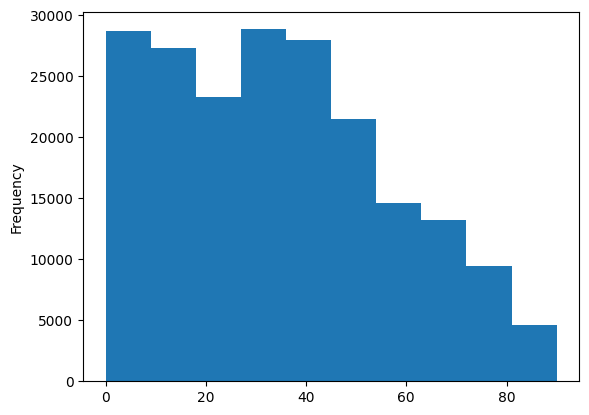

In [6]:
train_dset.data.age.plot.hist()

<Axes: >

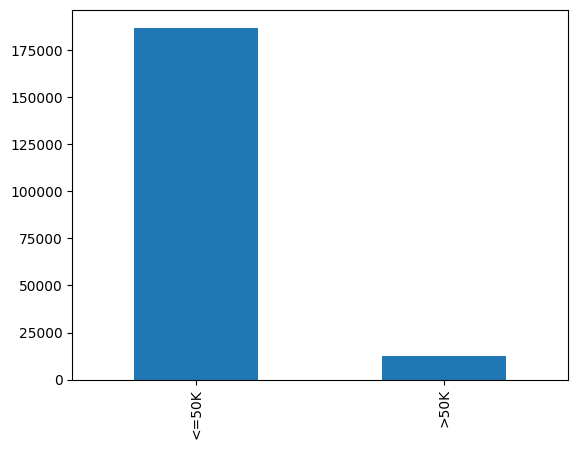

In [7]:
train_dset.data.income.value_counts().plot.bar()

In [8]:
test_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="test",
    random_state=1000,
    return_filtered_cols=True
)

print(test_dset.data.shape)
test_dset.data.head()

(99762, 11)


,age,capital_gains,capital_losses,class_of_worker,education,marital_stat,major_occupation_code,sex,race,country_of_birth_self,income
0,38.0,0.0,0.0,Private,1st 2nd 3rd or 4th grade,Married-civilian spouse present,Machine operators assmblrs & inspctrs,Female,White,Mexico,<=50K
1,44.0,0.0,0.0,Self-employed-not incorporated,Associates degree-occup /vocational,Married-civilian spouse present,Professional specialty,Female,White,United-States,<=50K
2,2.0,0.0,0.0,Not in universe,Children,Never married,Not in universe,Male,White,United-States,<=50K
3,35.0,0.0,0.0,Private,High school graduate,Divorced,Executive admin and managerial,Female,White,United-States,<=50K
4,49.0,0.0,0.0,Private,High school graduate,Divorced,Precision production craft & repair,Male,White,United-States,<=50K


<Axes: ylabel='Frequency'>

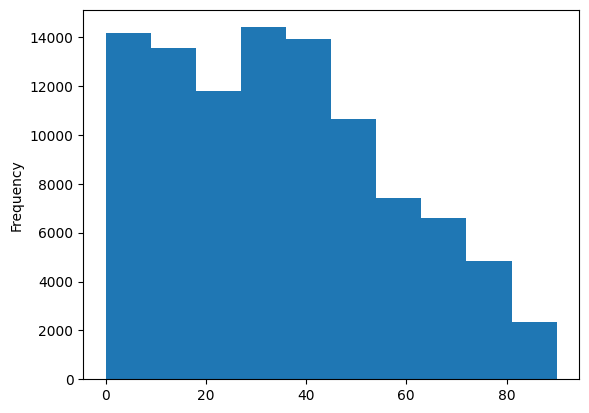

In [9]:
test_dset.data.age.plot.hist()

<Axes: >

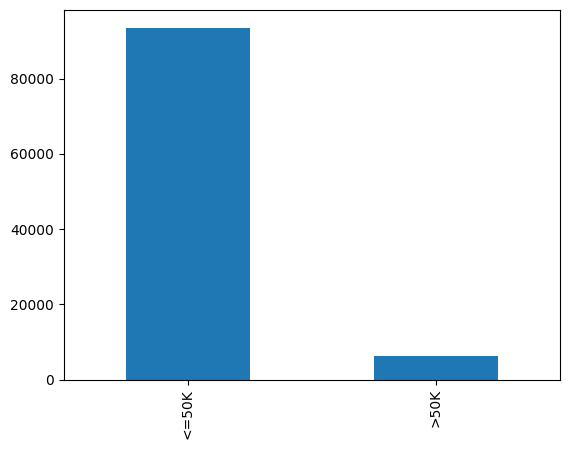

In [10]:
test_dset.data.income.value_counts().plot.bar()

## Train/Evaluate Logistic Regression model on filtered Columns 

In [11]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)

test_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    return_filtered_cols=True
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(199523, 11) (99762, 11)
# categorical columns: 8
features/label dim: (11, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.3941350257139731 
Acc Score: 0.8334937150417995


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Train/Evaluate Logistic Regression model on all columns

### Concatenate  discrete columns with numerical columns

In [12]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    handle_discrete_as="numeric",
    return_filtered_cols=False
)

test_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    handle_discrete_as="numeric",
    return_filtered_cols=False
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(199523, 41) (99762, 41)
# categorical columns: 29
features/label dim: (41, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.42780955325398046 
Acc Score: 0.851586776528137


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Concatenate  discrete columns with categorical columns

In [13]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

train_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="train",
    data_frac=None,
    random_state=1000,
    handle_discrete_as="categorial",
    return_filtered_cols=True
)

test_dset = Dataset(
    dataset_name="census",
    dataset_dir="../",
    subset="test",
    data_frac=None,
    random_state=1000,
    handle_discrete_as="categorial",
    return_filtered_cols=True
)


test_data = test_dset.data
train_data = train_dset.data
transformer.fit(train_data, train_dset.cat_cols)

print(train_data.shape, test_data.shape)
print(f"# categorical columns: {len(train_dset.cat_cols)}")
print(f"features/label dim: {test_dset.get_dim()}")

f1_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_score = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

print(f"F1 Score: {f1_score} \nAcc Score: {acc_score}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

(199523, 11) (99762, 11)
# categorical columns: 8
features/label dim: (11, 0)


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score: 0.3941350257139731 
Acc Score: 0.8334937150417995


## Train/Evaluate Logistic Regression model on filtered columns with varying data subsets

In [14]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [15]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="census",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        handle_discrete_as="numeric",
        return_filtered_cols=True
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    
    train_dset = Dataset(
        dataset_name="census",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        handle_discrete_as="numeric",
        return_filtered_cols=True
        )

    
    train_data = train_dset.data
    
    f1_train = metrics.efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = metrics.efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    f1_test = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 20480: Train/Test-F1: 0.402/0.394 Train/Test-Acc: 0.838/0.836


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 10240: Train/Test-F1: 0.400/0.384 Train/Test-Acc: 0.835/0.830


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 5120: Train/Test-F1: 0.419/0.390 Train/Test-Acc: 0.842/0.837


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 2560: Train/Test-F1: 0.465/0.398 Train/Test-Acc: 0.864/0.848


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 1280: Train/Test-F1: 0.507/0.398 Train/Test-Acc: 0.884/0.858


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 640: Train/Test-F1: 0.513/0.379 Train/Test-Acc: 0.884/0.846
subset: 320: Train/Test-F1: 0.532/0.327 Train/Test-Acc: 0.884/0.831
subset: 160: Train/Test-F1: 0.591/0.326 Train/Test-Acc: 0.887/0.829
subset: 80: Train/Test-F1: 0.667/0.314 Train/Test-Acc: 0.900/0.810
subset: 40: Train/Test-F1: 1.000/0.324 Train/Test-Acc: 1.000/0.896
subset: 20: Train/Test-F1: 1.000/0.174 Train/Test-Acc: 1.000/0.943


## Train/Evaluate Logistic Regression model on all columns with varying data subsets

In [16]:
from utils.misc import geometric_sequence
seed = 1000
subsets = geometric_sequence(start_value=20, 
                             common_ratio=2, 
                             size=10)

In [17]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_dset = Dataset(
        dataset_name="census",
        dataset_dir="../",
        subset="test",
        data_frac=None,
        random_state=seed,
        handle_discrete_as="numeric",
        return_filtered_cols=False
)

test_data = test_dset.data
transformer.fit(test_data, test_dset.cat_cols)

for subset in subsets:
    
    train_dset = Dataset(
        dataset_name="census",
        dataset_dir="../",
        subset="train",
        data_frac=subset,
        random_state=seed,
        handle_discrete_as="numeric",
        return_filtered_cols=False
        )

    
    train_data = train_dset.data
    
    f1_train = metrics.efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=transformer)
    acc_train = metrics.efficacy_test(fakedata=train_data, realdata=train_data, target_name="income", transformer=test_dset._transformer, scorer=accuracy_score)
    
    f1_test = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
    acc_test = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)

    print(f"subset: {subset}: Train/Test-F1: {f1_train:.3f}/{f1_test:.3f} Train/Test-Acc: {acc_train:.3f}/{acc_test:.3f}")
    

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 20480: Train/Test-F1: 0.443/0.427 Train/Test-Acc: 0.863/0.855


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 10240: Train/Test-F1: 0.451/0.426 Train/Test-Acc: 0.862/0.858


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 5120: Train/Test-F1: 0.493/0.437 Train/Test-Acc: 0.874/0.868


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 2560: Train/Test-F1: 0.570/0.450 Train/Test-Acc: 0.905/0.887


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 1280: Train/Test-F1: 0.617/0.446 Train/Test-Acc: 0.921/0.895


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 640: Train/Test-F1: 0.701/0.422 Train/Test-Acc: 0.945/0.900


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 320: Train/Test-F1: 0.759/0.425 Train/Test-Acc: 0.956/0.903


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in versio

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

subset: 160: Train/Test-F1: 0.903/0.421 Train/Test-Acc: 0.981/0.903


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 80: Train/Test-F1: 1.000/0.451 Train/Test-Acc: 1.000/0.904


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 40: Train/Test-F1: 1.000/0.362 Train/Test-Acc: 1.000/0.917


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

subset: 20: Train/Test-F1: 1.000/0.138 Train/Test-Acc: 1.000/0.942


## Train Logistic Regression model on Census train dataset, Evaluate on Census test and Adult test data

In [18]:
transformer = DataTransformer(
        discrete_encode="onehot",
        numerical_preprocess="standard",
        target="income"
)

test_adult_dset = Dataset(
            dataset_name="adult",
            dataset_dir="../",
            subset="test",
            data_frac=None,
            random_state=seed,
            return_filtered_cols=True
)

test_dset = Dataset(
            dataset_name="census",
            dataset_dir="../",
            subset="test",
            data_frac=None,
            random_state=seed,
            return_filtered_cols=True
    )

train_dset = Dataset(
        dataset_name="census",
        dataset_dir="../",
        subset="train",
        data_frac=None,
        random_state=seed,
        return_filtered_cols=True,
)



train_data = train_dset.data
test_data = test_dset.data
test_adult_data = test_adult_dset.data
test_adult_data.columns = train_data.columns

transformer.fit(train_data, train_dset.cat_cols)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarn

In [19]:
f1_census = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer)
acc_census = metrics.efficacy_test(fakedata=train_data, realdata=test_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
f1_adult = metrics.efficacy_test(fakedata=train_data, realdata=test_adult_data, target_name="income", transformer=transformer)
acc_adult = metrics.efficacy_test(fakedata=train_data, realdata=test_adult_data, target_name="income", transformer=transformer, scorer=accuracy_score)
    
    
    
    
print(f"Census/Adult F1 Score: {f1_census:.3f}/{f1_adult:.3f} \nCensus/Adult Acc Score: {acc_census:.3f}/{acc_adult:.3f}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Census/Adult F1 Score: 0.394/0.466 
Census/Adult Acc Score: 0.833/0.756


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

### Cenus Dataset

In [21]:
matrix = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=confusion_matrix)
print(matrix)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[77748 15828]
 [  783  5403]]


In [22]:
report = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_data, 
                               target_name="income", 
                               transformer=transformer,
                               scorer=classification_report)
print(report)

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90     93576
         1.0       0.25      0.87      0.39      6186

    accuracy                           0.83     99762
   macro avg       0.62      0.85      0.65     99762
weighted avg       0.94      0.83      0.87     99762



### Adult Dataset

In [23]:
matrix = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_adult_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=confusion_matrix)
print(matrix)

[[10574  1861]
 [ 2112  1734]]


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
report = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_adult_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=classification_report)
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     12435
         1.0       0.48      0.45      0.47      3846

    accuracy                           0.76     16281
   macro avg       0.66      0.65      0.65     16281
weighted avg       0.75      0.76      0.75     16281



/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Display mistakes across two datasets

In [25]:
import numpy as np
def unique_mistakes(y_true, y_pred):
    mistakes = np.where(y_true!=y_pred)[0]
    return mistakes

### Census test mistakes

In [26]:
mistakes_indices = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=unique_mistakes)
test_data.iloc[mistakes_indices].head()

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,age,capital_gains,capital_losses,class_of_worker,education,marital_stat,major_occupation_code,sex,race,country_of_birth_self,income
4,49.0,0.0,0.0,Private,High school graduate,Divorced,Precision production craft & repair,Male,White,United-States,<=50K
8,38.0,0.0,0.0,Private,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Professional specialty,Male,Black,United-States,<=50K
17,23.0,0.0,0.0,Private,Bachelors degree(BA AB BS),Married-civilian spouse present,Adm support including clerical,Male,White,United-States,<=50K
22,40.0,0.0,0.0,Private,Some college but no degree,Divorced,Executive admin and managerial,Female,White,?,<=50K
24,45.0,0.0,0.0,Private,Some college but no degree,Married-civilian spouse present,Sales,Male,White,United-States,<=50K


### Adult mistakes

In [27]:
mistakes_indices = metrics.efficacy_test(fakedata=train_data, 
                               realdata=test_adult_data, 
                               target_name="income", 
                               transformer=transformer, 
                               scorer=unique_mistakes)
test_adult_data.iloc[mistakes_indices].head()

/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,age,capital_gains,capital_losses,class_of_worker,education,marital_stat,major_occupation_code,sex,race,country_of_birth_self,income
2,28.0,0.0,0.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,White,United-States,>50K
9,55.0,0.0,0.0,Private,7th-8th,Married-civ-spouse,Craft-repair,Male,White,United-States,<=50K
13,58.0,0.0,0.0,?,HS-grad,Married-civ-spouse,?,Male,White,United-States,<=50K
15,43.0,0.0,0.0,Private,Masters,Married-civ-spouse,Exec-managerial,Male,White,United-States,>50K
19,40.0,0.0,0.0,Private,Doctorate,Married-civ-spouse,Prof-specialty,Male,Asian-Pac-Islander,?,>50K


### Which categorical column is most predictive

In [28]:
target = "income"
for col in train_dset.cat_cols:
    if col != target:
        train = train_data[[col, target]]
        test = test_data[[col, target]]
        test_adult=test_adult_data[[col, target]]

        transformer.fit(train, discrete_columns=[col, target])
        f1_census = metrics.efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer)
        acc_census = metrics.efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer, scorer=accuracy_score)

        f1_adult = metrics.efficacy_test(fakedata=train, realdata=test_adult, target_name="income", transformer=transformer)
        acc_adult = metrics.efficacy_test(fakedata=train, realdata=test_adult, target_name="income", transformer=transformer, scorer=accuracy_score)




        print(f"Column: {col} \nCensus/Adult F1 Score: {f1_census:.3f}/{f1_adult:.3f} \nCensus/Adult Acc Score: {acc_census:.3f}/{acc_adult:.3f}")


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Column: class_of_worker 
Census/Adult F1 Score: 0.207/0.322 
Census/Adult Acc Score: 0.558/0.373


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TO

Column: education 
Census/Adult F1 Score: 0.253/0.000 
Census/Adult Acc Score: 0.704/0.764


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Column: marital_stat 
Census/Adult F1 Score: 0.194/0.069 
Census/Adult Acc Score: 0.552/0.655


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Column: major_occupation_code 
Census/Adult F1 Score: 0.299/0.173 
Census/Adult Acc Score: 0.754/0.710


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Column: sex 
Census/Adult F1 Score: 0.180/0.443 
Census/Adult Acc Score: 0.555/0.497


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Column: race 
Census/Adult F1 Score: 0.126/0.392 
Census/Adult Acc Score: 0.188/0.336


/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tejumadeafonja/.env/faketable/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TO

Column: country_of_birth_self 
Census/Adult F1 Score: 0.121/0.390 
Census/Adult Acc Score: 0.120/0.275


### Which numerical column is most predictive

In [29]:
target = "income"
for col in train_dset.num_cols:
    train = train_data[[col, target]]
    test = test_data[[col, target]]
    test_adult=test_adult_data[[col, target]]

    transformer.fit(train, discrete_columns=[target])
    f1_census = metrics.efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer)
    acc_census = metrics.efficacy_test(fakedata=train, realdata=test, target_name="income", transformer=transformer, scorer=accuracy_score)

    f1_adult = metrics.efficacy_test(fakedata=train, realdata=test_adult, target_name="income", transformer=transformer)
    acc_adult = metrics.efficacy_test(fakedata=train, realdata=test_adult, target_name="income", transformer=transformer, scorer=accuracy_score)




    print(f"Column: {col} \nCensus/Adult F1 Score: {f1_census:.3f}/{f1_adult:.3f} \nCensus/Adult Acc Score: {acc_census:.3f}/{acc_adult:.3f}")


Column: age 
Census/Adult F1 Score: 0.187/0.440 
Census/Adult Acc Score: 0.642/0.635
Column: capital_gains 
Census/Adult F1 Score: 0.241/0.316 
Census/Adult Acc Score: 0.925/0.784
Column: capital_losses 
Census/Adult F1 Score: 0.142/0.161 
Census/Adult Acc Score: 0.930/0.762
